# TP: Traitement du langage naturel

## Chenrui ZHU

In [1]:
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Chargez les données de validation à l'aide de la bibliothèque csv dans un dictionnaire.

In [2]:
def load_data(file_path):
    data = {}
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for i, row in enumerate(reader):
            data[i] = {
                'id': row.get('id', None),
                'Party': row.get('Party', None),
                'Handle': row.get('Handle', None),
                'Tweet': row.get('Tweet', None),
            }
    return data

# Charger les données depuis les fichiers CSV
valid_data = load_data('ExtractedTweets_valid.csv')
train_data = load_data('ExtractedTweets_train.csv')
test_data = load_data('ExtractedTweets_test.csv')

Ecrivez une fonction qui prend en entrée un document et retourne sa version tokénisée. Pour cela, utilisez la bibliothèque nltk et la fonction nltk.word_tokenize.
- Comparez le résultat de la fonction nltk.word_tokenize et d'une méthode de segmentation plus simple ma_chaine.split(' ') sur quelques documents.
- Quelles sont les principales différences que vous observez ?

In [3]:
def tokenize_document(document):
    return word_tokenize(document)

# Test de la fonction de tokenization
document_example = valid_data[0]['Tweet']  # Choisissons le premier document pour l'exemple
tokens_nltk = tokenize_document(document_example)
tokens_split = document_example.split(' ')

print("NLTK Word Tokenize:", tokens_nltk)
print("Simple Split:", tokens_split)


NLTK Word Tokenize: ['#', 'SolutionsOnly', 'Idea', '2', ':', 'Improve', 'coordination', 'between', 'service', 'providers', ',', 'law', 'enforcement', 'and', 'the', 'community', '.', 'We', 'should…', 'https', ':', '//t.co/KnWCQlu2CO']
Simple Split: ['#SolutionsOnly', 'Idea', '2:', 'Improve', 'coordination', 'between', 'service', 'providers,', 'law', 'enforcement', 'and', 'the', 'community.', 'We', 'should…', 'https://t.co/KnWCQlu2CO']


Les différences principales que vous observerez sont :

- 'word_tokenize' prend en compte des caractères de ponctuation comme des tokens séparés, tandis que split ne le fait pas.
- 'word_tokenize' gère mieux les cas de ponctuation au sein des mots.
- 'split' ne tient pas compte des cas de ponctuation comme des tokens séparés.

Ecrivez ensuite une fonction qui prend en entrée un document tokénisé et ajoute pour chaque mot son étiquette morpho-syntaxique (ou POS tag) ainsi que sa version racinisée (ou stem).
- Un document sera de la forme [('TOKEN', 'POSTAG', 'STEM'), ('TOKEN', 'POSTAG', 'STEM'), ...]
- Pour les étiquettes morpho-syntaxiques vous pourrez utiliser la fonction nltk.pos_tag
- Pour la racinisation, l'algorithme de Porter, avec l'objet nltk.stem.PorterStemmer()
- Etudiez quelques documents pour vérifier la qualité des étiquettes morphosyntaxiques, et la forme racinisée des mots.

In [4]:
def pos_tag_and_stem(tokens):
    stemmer = PorterStemmer()
    tagged_tokens = pos_tag(tokens)
    result = []
    for token, tag in tagged_tokens:
        stemmed_token = stemmer.stem(token)
        result.append((token, tag, stemmed_token))
    return result

# Test de la fonction de POS tagging et stemming
tagged_and_stemmed = pos_tag_and_stem(tokens_nltk)
print(tagged_and_stemmed)

[('#', '#', '#'), ('SolutionsOnly', 'NNP', 'solutionsonli'), ('Idea', 'NNP', 'idea'), ('2', 'CD', '2'), (':', ':', ':'), ('Improve', 'VB', 'improv'), ('coordination', 'NN', 'coordin'), ('between', 'IN', 'between'), ('service', 'NN', 'servic'), ('providers', 'NNS', 'provid'), (',', ',', ','), ('law', 'NN', 'law'), ('enforcement', 'NN', 'enforc'), ('and', 'CC', 'and'), ('the', 'DT', 'the'), ('community', 'NN', 'commun'), ('.', '.', '.'), ('We', 'PRP', 'we'), ('should…', 'VBP', 'should…'), ('https', 'NNS', 'http'), (':', ':', ':'), ('//t.co/KnWCQlu2CO', 'NN', '//t.co/knwcqlu2co')]


Grâce à ces fonctions pré-traitez tous les documents

In [5]:
def preprocess_data(data):
    preprocessed_data = {}
    for i, document in data.items():
        tokens = tokenize_document(document['Tweet'])
        tagged_and_stemmed = pos_tag_and_stem(tokens)
        preprocessed_data[i] = tagged_and_stemmed
    return preprocessed_data

# Prétraitement des données d'entraînement, de validation et de test
preprocessed_train_data = preprocess_data(train_data)
preprocessed_valid_data = preprocess_data(valid_data)
preprocessed_test_data = preprocess_data(test_data)

Ecrivez le code qui permet de retrouver le plus de document sur le changement climatique (climate change).
- Quels mots pouvez-vous rechercher ?
- Utiliser les formes racinisés est-il est plus pertinent que les mots ?
- Les documents contenant "climate" parlent-ils tous de changement climatique ? Comment ne pas les retourner ?

In [6]:
def find_climate_change_documents(data):
    relevant_documents = []
    stemmer = PorterStemmer()
    climate_keywords = ["climate", "change", "warm"]
    for doc_id, document in data.items():
        tokens = [stemmer.stem(token.lower()) for token, _, _ in document]  # Utilisation des formes racinisées
        contains_climate = any(keyword in tokens for keyword in climate_keywords)
        if contains_climate:
            relevant_documents.append(doc_id)
    return relevant_documents

# Trouver les documents sur le changement climatique dans les données d'entraînement
relevant_train_documents = find_climate_change_documents(preprocessed_train_data)
print("Documents pertinents sur le changement climatique dans les données d'entraînement:", relevant_train_documents)


Documents pertinents sur le changement climatique dans les données d'entraînement: [1470, 1833, 3520, 4153, 4623, 5949, 9686, 12743, 12825, 13086, 14646, 15423, 16985, 18961, 18962, 18989, 19277, 19495, 20335, 20500, 22886, 27928, 28005, 28724, 30478, 32520, 33277, 36199, 36205, 37887, 38499, 39582, 39773, 39907, 41861, 45397, 47274, 58719, 58958, 59827, 61513, 62948, 63455, 65046, 66035]


### Sauvegarde sur le disque
Le choix du format de stockage de document pré-traité n'est pas trivial, nous proposons ici d'utilise le format jsonl qui permet de sauvegarder les données au format json. Cette n'est ni la meilleure ni la seules, tout dépend de l'utilisation qui sera faite des données, de la taille des fichiers, etc.

In [7]:
import json

# Sauvegarder les données
def save_data_to_jsonl(data, file_path, preprocessed_data):
    with open(file_path, 'w', encoding='utf-8') as f:
        for i, doc in data.items():
            # Chaque ligne devient un dictionnaire python
            r = {
                'id': doc['id'], 
                'Party': doc['Party'],
                'Handle': doc['Handle'],
                'Tweet': doc['Tweet'], # le tweet original non prétraité
                'PreTweet': preprocessed_data[i] # la version prétraitée du tweet
            }
            # Chaque dictionnaire est serialisé en json
            f.write(json.dumps(r) + '\n')

save_data_to_jsonl(valid_data, 'preprocessed_valid_data.jsonl', preprocessed_valid_data)
save_data_to_jsonl(train_data, 'preprocessed_train_data.jsonl', preprocessed_train_data)
save_data_to_jsonl(test_data, 'preprocessed_test_data.jsonl', preprocessed_test_data)

In [8]:
import json

# Charger les données
def load_data_from_jsonl(file_path):
    data = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    return data

loaded_valid_data = load_data_from_jsonl('preprocessed_valid_data.jsonl')
loaded_train_data = load_data_from_jsonl('preprocessed_train_data.jsonl')
loaded_test_data = load_data_from_jsonl('preprocessed_test_data.jsonl')


## Exercice 2: Exploration des données

En utilisant les fichiers précédemment pré-traités, extrayez et visualisez les informations suivantes (visualisez ces informations aussi en fonction du parti de l'auteur ou l'autrice du tweet):

1. La longueur des tweets en termes de caractères et de mots

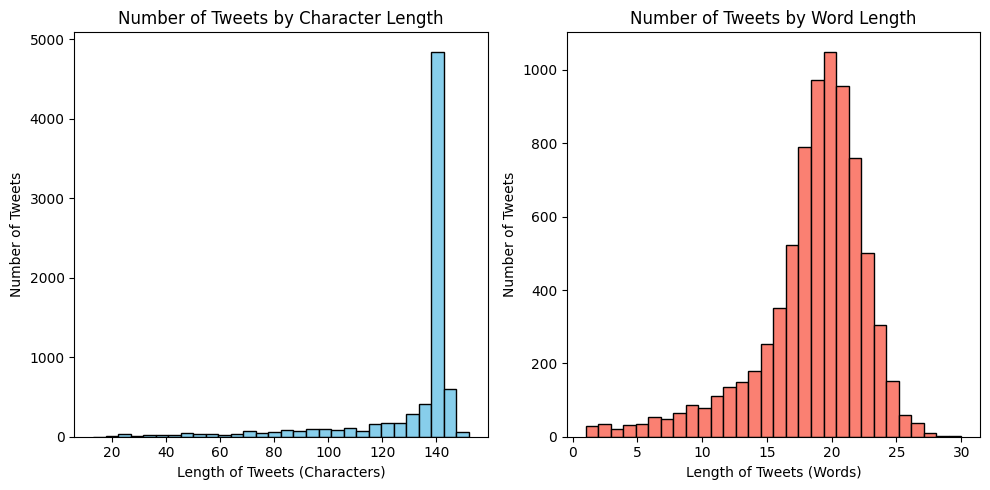

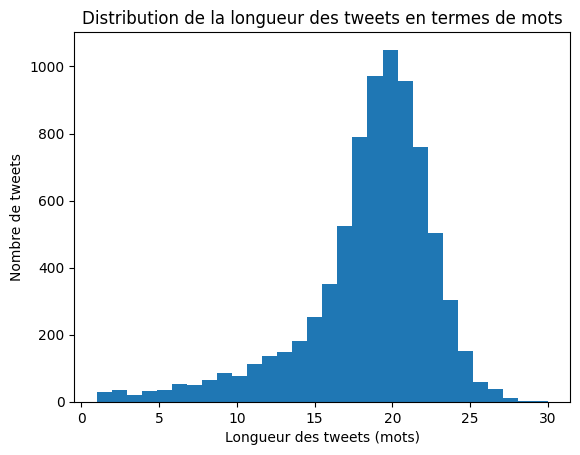

In [9]:
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Longueur des tweets en termes de caractères et de mots
def tweet_lengths(data):
    char_lengths = []
    word_lengths = []
    for tweet_data in data:
        tweet = tweet_data['Tweet']
        char_lengths.append(len(tweet))
        word_lengths.append(len(tweet.split()))
    return char_lengths, word_lengths

def visualize_tweet_lengths(char_lengths, word_lengths):
    plt.figure(figsize=(10, 5))

    # Plot histogram for character lengths
    plt.subplot(1, 2, 1)
    plt.hist(char_lengths, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Length of Tweets (Characters)')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets by Character Length')

    # Plot histogram for word lengths
    plt.subplot(1, 2, 2)
    plt.hist(word_lengths, bins=30, color='salmon', edgecolor='black')
    plt.xlabel('Length of Tweets (Words)')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets by Word Length')

    plt.tight_layout()
    plt.show()

char_lengths, word_lengths = tweet_lengths(loaded_valid_data) 
visualize_tweet_lengths(char_lengths, word_lengths)

# 2. Fréquence des mots, lemmes et formes racinées
def word_frequencies(data):
    words = [word for tweet in data for word in nltk.word_tokenize(tweet)]
    # Filtrer les mots vides
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    lemma_words = [word.lower() for word in words]  # Supposons que nous n'avons pas de lemmatizer
    stem_words = [word.lower() for word in words]  # Supposons que nous n'avons pas de stemmer
    return Counter(words), Counter(lemma_words), Counter(stem_words)

# 3. 20 n-grammes les plus fréquents (de 1 à 5)
def top_ngrams(data, n=20):
    ngram_counts = Counter()
    for tweet in data:
        tokens = nltk.word_tokenize(tweet)
        for i in range(1, 6):
            ngram_counts.update(ngrams(tokens, i))
    return ngram_counts.most_common(n)

# 4. 20 noms, verbes, adverbes et adjectifs les plus fréquents
def top_pos_tags(data, pos_tags=['NOUN', 'VERB', 'ADV', 'ADJ'], n=20):
    pos_counts = Counter()
    for tweet in data:
        tokens = nltk.word_tokenize(tweet)
        tagged_tokens = nltk.pos_tag(tokens)
        for token, pos_tag in tagged_tokens:
            if pos_tag in pos_tags:
                pos_counts[token.lower()] += 1
    return pos_counts.most_common(n)

# 5. Tf-Idf sur les unigrammes
def calculate_tfidf(data):
    vectorizer = TfidfVectorizer(analyzer=lambda x: x, lowercase=False)
    tfidf_matrix = vectorizer.fit_transform(data)
    return tfidf_matrix, vectorizer.get_feature_names_out()

# Supposons que 'preprocessed_data' soit une liste de tweets prétraités
char_lengths, word_lengths = tweet_lengths(loaded_valid_data)
# word_freq, lemma_freq, stem_freq = word_frequencies(preprocessed_data)
# top_20_ngrams = top_ngrams(preprocessed_data)
# top_20_pos_tags = top_pos_tags(preprocessed_data)
# tfidf_matrix, feature_names = calculate_tfidf(preprocessed_data)

# Visualisation des résultats
# Par exemple, pour afficher la longueur des tweets en termes de mots
plt.hist(word_lengths, bins=30)
plt.xlabel('Longueur des tweets (mots)')
plt.ylabel('Nombre de tweets')
plt.title('Distribution de la longueur des tweets en termes de mots')
plt.show()


2. La fréquence des mots, lemmes et formes racinées
    - Faire un graphique représentant la fréquence des mots par ordre décroissant (avec une échelle logarithmique).
    - Vous devez observer la loi de Zipf, seuls quelques mots constituent une grande partie du corpus.
    - Ces mots n'apportent généralement que peu d'information, on dit que ce sont des mots vides (stopwords), contrairement aux mots plein (en général noms, adjectifs, verbes, ...). Il est courant de les filtrer pour ne pas surcharger les modèles. Des listes de stopwords sont disponibles dans nltk.corpus.stopwords.words, chaque bibliothèque de TAL possède en général sa liste.
    - /!\ Il est important d'utiliser une liste compatible avec le tokeniseur utilisé. En effet, il est fréquent que 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


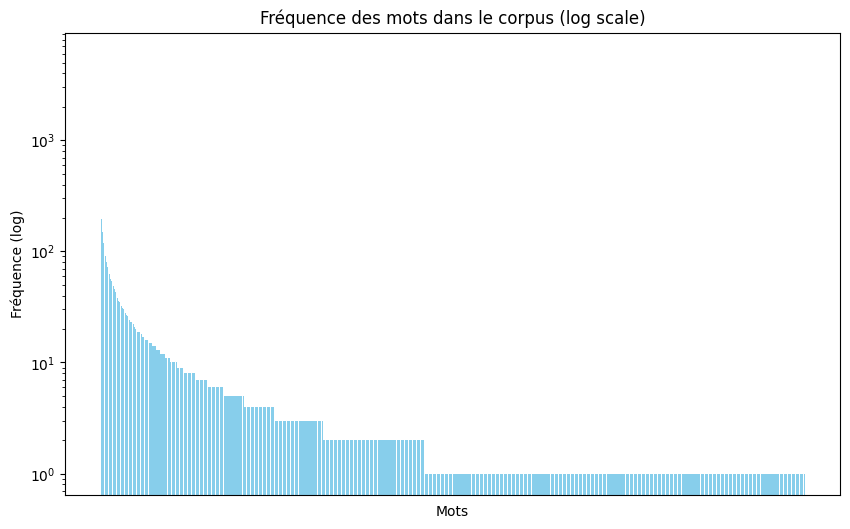

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Charger les stopwords en anglais
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def plot_word_frequencies(data):
    # Compter la fréquence des mots
    word_freq = Counter()
    for tweet_data in data:
        tweet = tweet_data['PreTweet']
        for word in tweet:
            if word[0].lower() not in stop_words and word[0].isalpha():
                word_freq[word[0].lower()] += 1

    # Trier les mots par fréquence décroissante
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Extraire les mots et les fréquences triés
    sorted_words = [item[0] for item in sorted_word_freq]
    sorted_freqs = [item[1] for item in sorted_word_freq]

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_words)), sorted_freqs, color='skyblue')
    plt.yscale('log')  # Utiliser une échelle logarithmique sur l'axe y
    plt.xlabel('Mots')
    plt.ylabel('Fréquence (log)')
    plt.title('Fréquence des mots dans le corpus (log scale)')
    plt.xticks([], [])  # Masquer les étiquettes de l'axe x
    plt.show()

# Utiliser la fonction pour tracer le graphique de la fréquence des mots
plot_word_frequencies(loaded_valid_data)  # Remplacez 'data' par vos données prétraitées



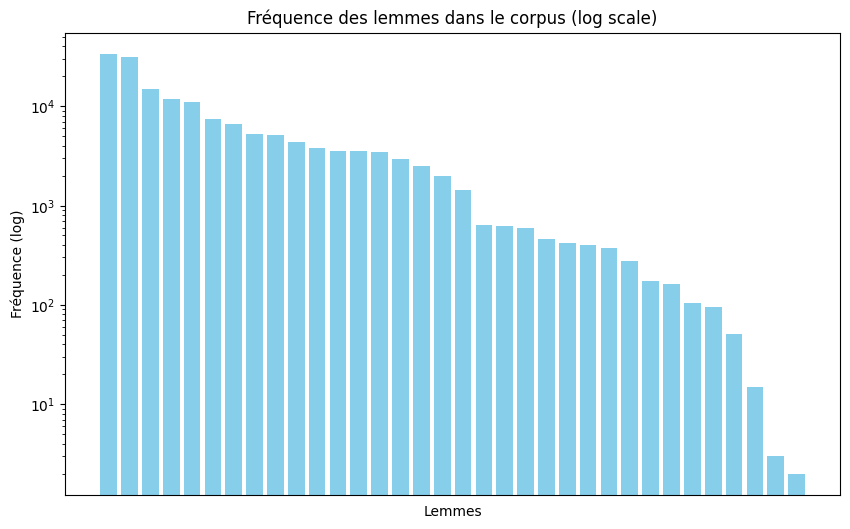

In [15]:
def plot_lemme_frequencies(data):
    # Compter la fréquence des mots
    word_freq = Counter()
    for tweet_data in data:
        tweet = tweet_data['PreTweet']
        for word in tweet:
            if word[1].lower() and word[1].isalpha():
                word_freq[word[1].lower()] += 1

    # Trier les mots par fréquence décroissante
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Extraire les mots et les fréquences triés
    sorted_words = [item[0] for item in sorted_word_freq]
    sorted_freqs = [item[1] for item in sorted_word_freq]

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_words)), sorted_freqs, color='skyblue')
    plt.yscale('log')  # Utiliser une échelle logarithmique sur l'axe y
    plt.xlabel('Lemmes')
    plt.ylabel('Fréquence (log)')
    plt.title('Fréquence des lemmes dans le corpus (log scale)')
    plt.xticks([], [])  # Masquer les étiquettes de l'axe x
    plt.show()

plot_lemme_frequencies(loaded_valid_data)

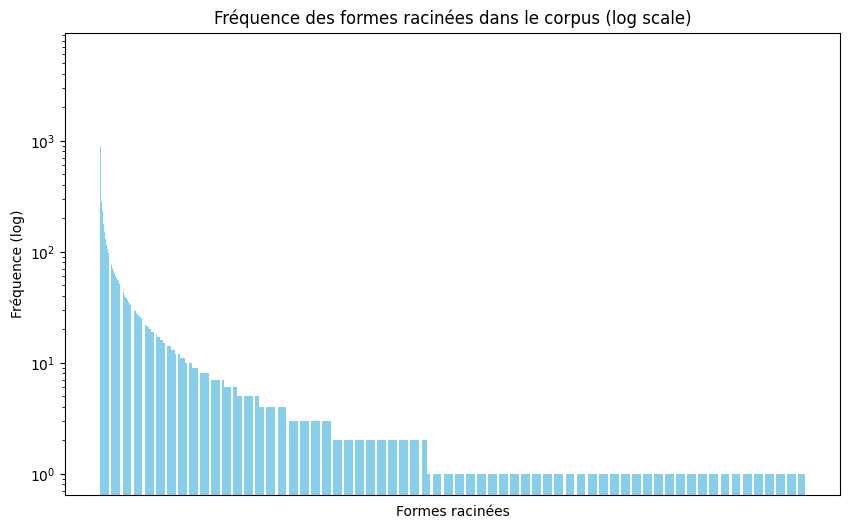

In [16]:
def plot_origin_frequencies(data):
    # Compter la fréquence des mots
    word_freq = Counter()
    for tweet_data in data:
        tweet = tweet_data['PreTweet']
        for word in tweet:
            if word[2].lower() not in stop_words and word[2].isalpha():
                word_freq[word[2].lower()] += 1

    # Trier les mots par fréquence décroissante
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Extraire les mots et les fréquences triés
    sorted_words = [item[0] for item in sorted_word_freq]
    sorted_freqs = [item[1] for item in sorted_word_freq]

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_words)), sorted_freqs, color='skyblue')
    plt.yscale('log')  # Utiliser une échelle logarithmique sur l'axe y
    plt.xlabel('Formes racinées')
    plt.ylabel('Fréquence (log)')
    plt.title('Fréquence des formes racinées dans le corpus (log scale)')
    plt.xticks([], [])  # Masquer les étiquettes de l'axe x
    plt.show()

plot_origin_frequencies(loaded_valid_data)

3. Les 20 n-grammes (de 1 à 5) les plus fréquent

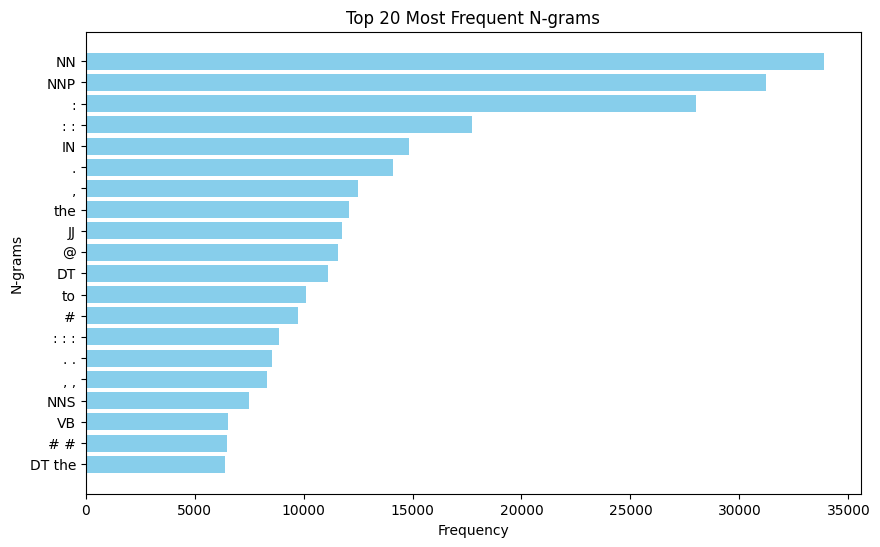

In [17]:
import nltk
from collections import Counter

def top_ngrams(data, n=5, top_k=20):
    ngram_counts = Counter()
    for tweet_data in data:
        tweet = tweet_data['PreTweet']
        # Generate n-grams for each tweet
        for word in tweet:
            for i in range(1, n+1):
                ngrams_list = nltk.ngrams(word, i)
                ngram_counts.update(ngrams_list)
    # Select the top k most frequent n-grams
    top_ngrams = ngram_counts.most_common(top_k)
    return top_ngrams

def plot_top_ngrams(top_ngrams_list):
    ngrams, frequencies = zip(*top_ngrams_list)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(ngrams)), frequencies, color='skyblue')
    plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams])
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title('Top 20 Most Frequent N-grams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
    plt.show()

top_20_ngrams = top_ngrams(loaded_valid_data)
plot_top_ngrams(top_20_ngrams)

4. les 20 noms, verbes, adverbes et adjectifs les plus fréquents

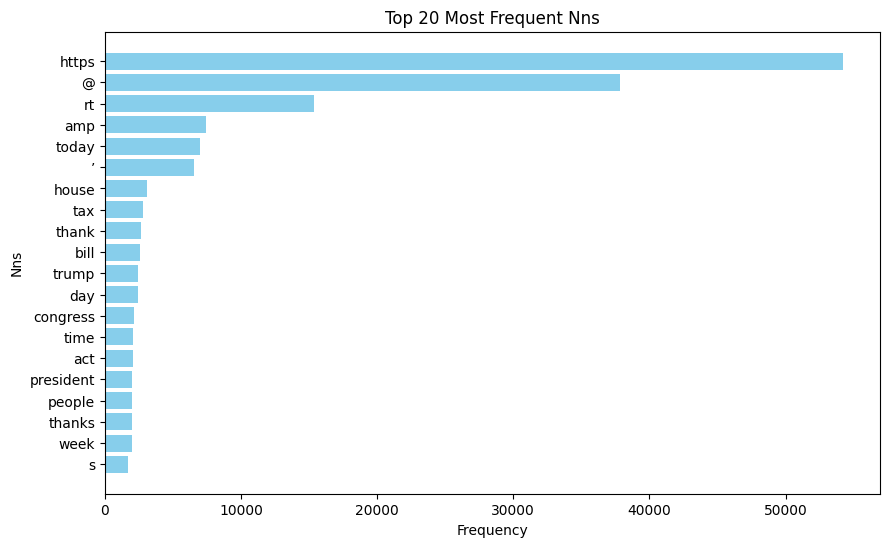

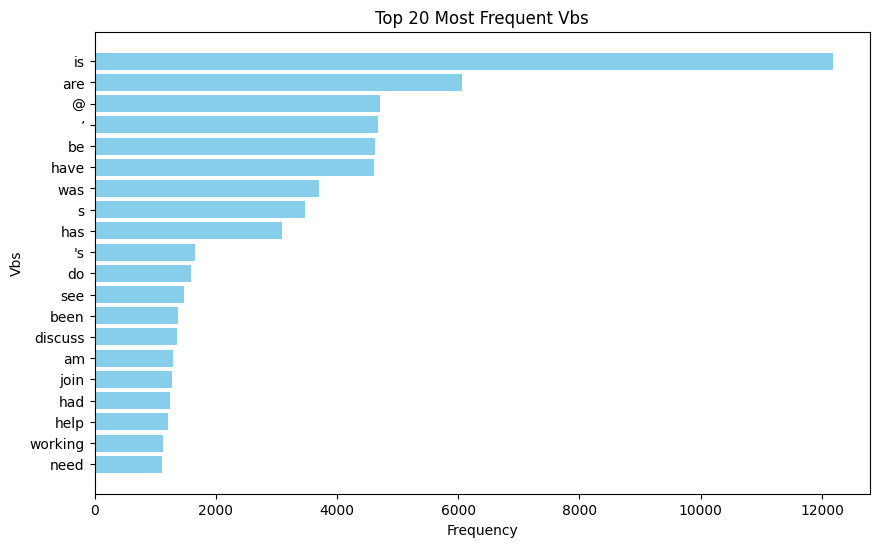

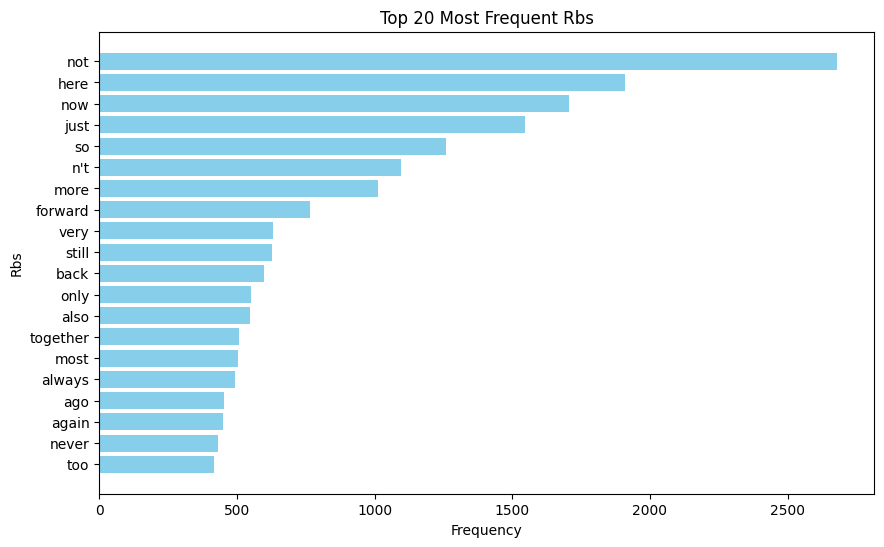

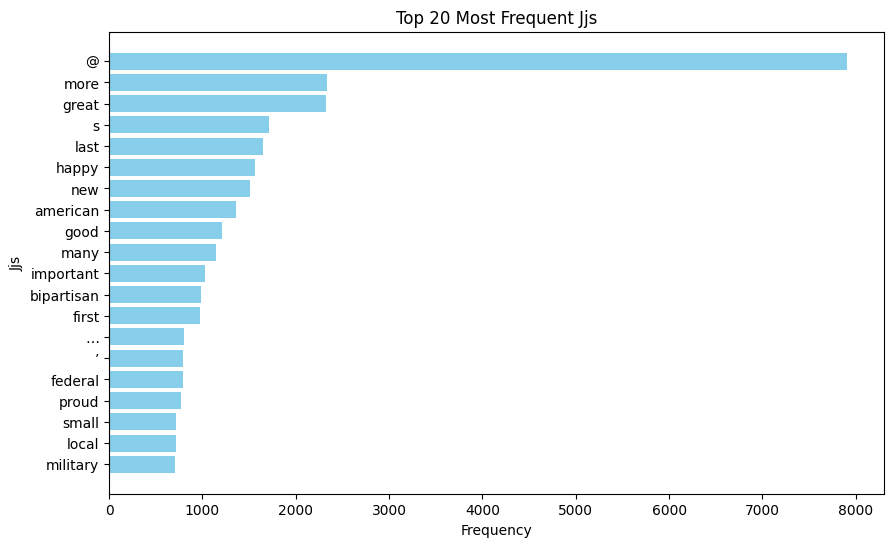

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

def top_pos_tags(data, pos_tag):
    pos_tag_counts = Counter()
    for tweet_data in data:
        tweet = tweet_data['PreTweet']
        # Filter tokens based on the specified POS tag
        filtered_tokens = [token[0].lower() for token in tweet if token[1].startswith(pos_tag)]
        pos_tag_counts.update(filtered_tokens)
    # Select the top 20 most frequent tokens
    top_tokens = pos_tag_counts.most_common(20)
    return top_tokens

def plot_top_pos_tags(top_tokens, pos_tag):
    tokens, frequencies = zip(*top_tokens)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(tokens)), frequencies, color='skyblue')
    plt.yticks(range(len(tokens)), tokens)
    plt.xlabel('Frequency')
    plt.ylabel('{}'.format(pos_tag.capitalize() + 's'))  # Capitalize and add 's' to the POS tag for label
    plt.title('Top 20 Most Frequent {}s'.format(pos_tag.capitalize()))
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
    plt.show()

# Example usage:
pos_tags = ['NN', 'VB', 'RB', 'JJ']  # POS tags for noun, verb, adverb, and adjective respectively

for tag in pos_tags:
    top_tokens = top_pos_tags(loaded_train_data, tag)
    plot_top_pos_tags(top_tokens, tag)


5. le Tf-Idf sur les unigrammes en considérant chaque tweet comme un document (utilisez la bibliothèque scikit-learn)
    - Nos tweets sont déjà segmentés, pour pouvoir passer en entrée des document pré-segmentés passer le paramètre analyzer=lambda x: x aux vectorizer. L'analyzer, segmente, met en minuscule, filtre les mots vide et supprime les accents (voir les paramètres de CountTokenizer).

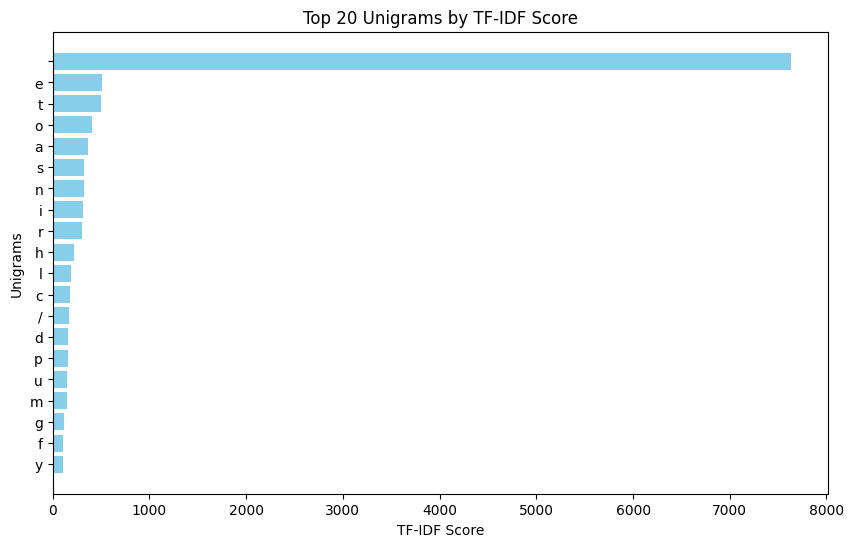

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

def compute_tfidf(data):
    # Extract preprocessed tweets
    preprocessed_tweets = [' '.join(tweet_data['Tweet']) for tweet_data in data]
    # Initialize TfidfVectorizer with custom analyzer
    vectorizer = TfidfVectorizer(analyzer=lambda x: x)
    # Compute TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform(preprocessed_tweets)
    # Get feature names (unigrams)
    feature_names = vectorizer.get_feature_names_out()
    # Sum TF-IDF scores for each feature (unigram) across all tweets
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    # Create dictionary mapping feature names to TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    return tfidf_dict

def plot_tfidf(tfidf_dict, top_k=20):
    # Select the top k features (unigrams) with highest TF-IDF scores
    top_features = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:top_k]
    feature_names, tfidf_scores = zip(*top_features)
    # Plot the top k features
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), tfidf_scores, color='skyblue')
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Unigrams')
    plt.title('Top {} Unigrams by TF-IDF Score'.format(top_k))
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest TF-IDF score at the top
    plt.show()

# Example usage:
tfidf_dict = compute_tfidf(loaded_valid_data)  # Assuming 'data' contains your preprocessed tweet data
plot_tfidf(tfidf_dict)


## Exercice 3 : Faire un classifieur

Premier classifieur

0. Vérifier que le code ci-dessus s'execute bien
1. Entrainer le modèle avec tout le corpus d'entraînement
2. Evaluer les performances d'apprentissage (avec le corpus d'entraînement) et les performances de généralisation (avec le corpus de validation). Qu'est-ce que vous remarquez ? Est-ce normal ?


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

valid = pd.DataFrame(loaded_valid_data)
train = pd.DataFrame(loaded_train_data)

def compute_columns(df):
	# On extrait les lemmes
	df['lemmas'] = df['PreTweet'].apply(lambda x: [t[2] for t in x])
	if 'Party' in df.columns:
		# La valeur à prédire par le classifieur sera True ou False
		df['is_democrat'] = df['Party'].apply(lambda x: 'Democrat' == x)
	return df

valid = compute_columns(valid)
train = compute_columns(train)

pipeline = Pipeline([
	# Compute TfIdf
    ('tfidf', TfidfVectorizer(analyzer=lambda x: x)),
    # Classify using TfIdf
    ('clf', LogisticRegression()),
], verbose=True)

# # Entraînement du modèle
# pipeline.fit(train['lemmas'], train['is_democrat'])
# # Prédit les étiquettes
# pipeline.predict(train['lemmas'])
# # Retourne la probabilité de l'étiquette True et False.
# pipeline.predict_proba(train['lemmas'])

# Entraînement du modèle
pipeline.fit(train['lemmas'], train['is_democrat'])

# Prédit les étiquettes sur les données d'entraînement
train_predictions = pipeline.predict(train['lemmas'])
# Prédit les étiquettes sur les données de validation
valid_predictions = pipeline.predict(valid['lemmas'])

# Calcul de l'accuracy du modèle sur les données d'entraînement
# Nombre d'exemple dont la prédiction est bonne / Nombre total d'exemple
train_accuracy = pipeline.score(train['lemmas'], train['is_democrat'])
# Calcul de l'accuracy du modèle sur les données de validation
valid_accuracy = pipeline.score(valid['lemmas'], valid['is_democrat'])

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.9s
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Pipeline] ............... (step 2 of 2) Processing clf, total=  22.0s
Training Accuracy: 0.865049333885454
Validation Accuracy: 0.8452641048708393


Il est courant que la précision de l'apprentissage soit légèrement supérieure à la précision de la généralisation. Cela est dû au fait que le modèle est ajusté aux données d'entraînement spécifiques et peut surapprendre (overfit) ces données, ce qui se traduit par une précision plus élevée sur l'ensemble d'entraînement.

Cependant, il est important de noter que dans ce cas, le modèle a émis un avertissement de convergence lors de l'entraînement, indiquant que le nombre maximal d'itérations a été atteint avant que la convergence ne soit atteinte. Cela peut affecter la qualité du modèle entraîné et nécessiter une exploration plus approfondie.

3. Etant donnée les prediction et la référence ci-dessous. Remplissez une matrice de confusion. La matrice de confusion nous donne une information plus précise sur les erreurs de prédiction.

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion pour les données d'entraînement
train_confusion_matrix = confusion_matrix(train['is_democrat'], train_predictions)

# Ajouter des en-têtes pour les classes prédites et les classes réelles
train_confusion_df = pd.DataFrame(train_confusion_matrix, 
                                  index=['True Democrat', 'True Republican'], 
                                  columns=['Predicted Democrat', 'Predicted Republican'])

print("Matrice de confusion pour les données d'entraînement :")
print(train_confusion_df)

# Calculer la matrice de confusion pour les données d'entraînement
valid_confusion_matrix = confusion_matrix(valid['is_democrat'], valid_predictions)

# Ajouter des en-têtes pour les classes prédites et les classes réelles
valid_confusion_df = pd.DataFrame(valid_confusion_matrix, 
                                  index=['True Democrat', 'True Republican'], 
                                  columns=['Predicted Democrat', 'Predicted Republican'])

print("Matrice de confusion pour les données d'validation :")
print(valid_confusion_df)

Matrice de confusion pour les données d'entraînement :
                 Predicted Democrat  Predicted Republican
True Democrat                 31515                  4366
True Republican                5085                 29067
Matrice de confusion pour les données d'validation :
                 Predicted Democrat  Predicted Republican
True Democrat                  3467                   542
True Republican                 662                  3110


4. Quel est le mot le plus important pour définir si un tweet a été écrit pas un démocrate ? (utilisez le vocabulaire du tfidf et les coefficients du modèle)

In [22]:
# Récupérer le vectoriseur TF-IDF et le modèle de régression logistique du pipeline
tfidf_vectorizer = pipeline.named_steps['tfidf']
logistic_regression = pipeline.named_steps['clf']

# Récupérer les coefficients du modèle de régression logistique
coefficients = logistic_regression.coef_[0]

# Récupérer le vocabulaire (mots) du vectoriseur TF-IDF
vocabulary = tfidf_vectorizer.get_feature_names_out()

# Créer un dictionnaire associant chaque mot à son coefficient dans le modèle
word_coefficients = dict(zip(vocabulary, coefficients))

# Trouver le mot le plus important pour définir si un tweet a été écrit par un démocrate
most_important_word = max(word_coefficients, key=word_coefficients.get)
coefficient_value = word_coefficients[most_important_word]

print("Mot le plus important pour définir si un tweet a été écrit par un démocrate :", most_important_word)
print("Coefficient associé :", coefficient_value)


Mot le plus important pour définir si un tweet a été écrit par un démocrate : goptaxscam
Coefficient associé : 7.80668116468458


5. Quelle est la fréquence de ce mot dans les tweet des démocrates ? Des républicains ?

In [23]:
# Récupérer les données d'entraînement
train_data = pd.DataFrame(loaded_train_data)

# Filtrer les données pour obtenir uniquement les tweets des démocrates et des républicains
democrat_tweets = train_data[train_data['Party'] == 'Democrat']
republican_tweets = train_data[train_data['Party'] == 'Republican']

# Compter le nombre de fois où le mot le plus important apparaît dans les tweets des démocrates
democrat_word_frequency = democrat_tweets['PreTweet'].apply(lambda tweet: sum(1 for word in tweet if word[2] == most_important_word)).sum()

# Compter le nombre de fois où le mot le plus important apparaît dans les tweets des républicains
republican_word_frequency = republican_tweets['PreTweet'].apply(lambda tweet: sum(1 for word in tweet if word[2] == most_important_word)).sum()

print("Fréquence du mot le plus important dans les tweets des démocrates :", democrat_word_frequency)
print("Fréquence du mot le plus important dans les tweets des républicains :", republican_word_frequency)

Fréquence du mot le plus important dans les tweets des démocrates : 514
Fréquence du mot le plus important dans les tweets des républicains : 0


6. Y a-t-il des tweet qui ont été mal classifié mais dont le classifieur est sûr de sa prédiction ? (probabilité élevée > 0.7)

In [24]:
# Prédire les étiquettes et les probabilités associées aux données de validation
predicted_labels = pipeline.predict(valid['lemmas'])
predicted_probabilities = pipeline.predict_proba(valid['lemmas'])

# Identifier les tweets mal classifiés mais pour lesquels le classifieur est sûr de sa prédiction
misclassified_confident_tweets = []
for i, (pred_label, true_label, prob) in enumerate(zip(predicted_labels, valid['is_democrat'], predicted_probabilities)):
    if pred_label != true_label and max(prob) > 0.7:
        misclassified_confident_tweets.append({
            'Tweet': valid['Tweet'].iloc[i],
            'True Label': true_label,
            'Predicted Label': pred_label,
            'Probability': max(prob)
        })

# Afficher les tweets mal classifiés mais pour lesquels le classifieur est sûr de sa prédiction
for tweet in misclassified_confident_tweets:
    print("Tweet:", tweet['Tweet'])
    print("True Label:", tweet['True Label'])
    print("Predicted Label:", tweet['Predicted Label'])
    print("Probability:", tweet['Probability'])
    print()

Tweet: Took part in the bipartisan Congressional Caucus for Women’s Issues hearing today on sexual harassment in high-tech… https://t.co/xRbTeLWORU
True Label: False
Predicted Label: True
Probability: 0.7189926287600362

Tweet: I had the honor of meeting with Lieutenant General Charles D. Luckey with the National Guard Reserve yesterday to d… https://t.co/xkbR5QHIGG
True Label: True
Predicted Label: False
Probability: 0.7537292005281793

Tweet: Proud to pass the SHIELDS Act w/@RepGallagher. We must stop Hizballah from using innocent civilians as human shields https://t.co/q1BOssBJrk
True Label: True
Predicted Label: False
Probability: 0.8129732523823321

Tweet: Join me this weekend in remembering those who've lost their lives protecting people &amp; property fighting fires. Than… https://t.co/H9ACDiEHkn
True Label: False
Predicted Label: True
Probability: 0.703601667558881

Tweet: My statement on the deal brokered by President Trump that addresses the ever-changing pricing of Renewable

7. Analyser les résultats avec des(précision/rappel & F-1 Score & courbes ROC) 

Rapport de classification pour les données d'entraînement :
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     35881
        True       0.87      0.85      0.86     34152

    accuracy                           0.87     70033
   macro avg       0.87      0.86      0.86     70033
weighted avg       0.87      0.87      0.87     70033



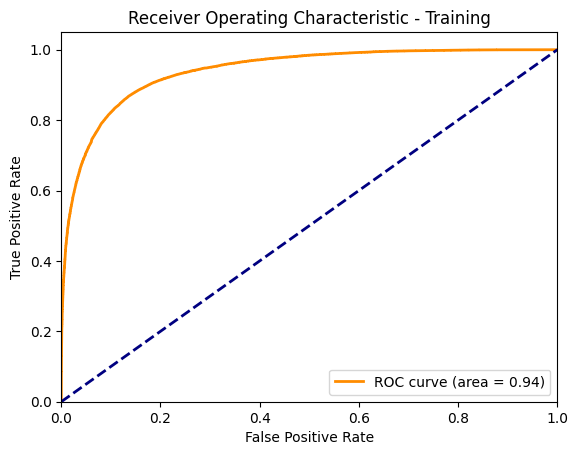

In [25]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Rapport de classification pour les données d'entraînement
print("Rapport de classification pour les données d'entraînement :")
print(classification_report(train['is_democrat'], train_predictions))

# Calcul des courbes ROC pour les données d'entraînement
train_fpr, train_tpr, _ = roc_curve(train['is_democrat'], pipeline.predict_proba(train['lemmas'])[:,1])
train_roc_auc = auc(train_fpr, train_tpr)

# Affichage de la courbe ROC pour les données d'entraînement
plt.figure()
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Training')
plt.legend(loc="lower right")
plt.show()


8. Tester différentes modèles (SVM, arbres de décisions...)

In [26]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Initialisation des modèles
svm_model = LinearSVC()
tree_model = DecisionTreeClassifier()

# Création d'un pipeline pour chaque modèle
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=lambda x: x)),
    ('clf', svm_model),
], verbose=True)

tree_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=lambda x: x)),
    ('clf', tree_model),
], verbose=True)

# Entraînement des modèles
svm_pipeline.fit(train['lemmas'], train['is_democrat'])
tree_pipeline.fit(train['lemmas'], train['is_democrat'])

# Évaluation des performances sur les données de validation
svm_valid_accuracy = svm_pipeline.score(valid['lemmas'], valid['is_democrat'])
tree_valid_accuracy = tree_pipeline.score(valid['lemmas'], valid['is_democrat'])

print("Validation Accuracy - SVM Linear:", svm_valid_accuracy)
print("Validation Accuracy - Decision Tree:", tree_valid_accuracy)


[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.9s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.9s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  39.4s
Validation Accuracy - SVM Linear: 0.9446086621256908
Validation Accuracy - Decision Tree: 0.9271301889217324


Classification Report - LinearSVC:
              precision    recall  f1-score   support

  Republican       0.94      0.95      0.95      4009
    Democrat       0.95      0.94      0.94      3772

    accuracy                           0.94      7781
   macro avg       0.94      0.94      0.94      7781
weighted avg       0.94      0.94      0.94      7781

Classification Report - Decision Tree:
              precision    recall  f1-score   support

  Republican       0.92      0.94      0.93      4009
    Democrat       0.93      0.92      0.92      3772

    accuracy                           0.93      7781
   macro avg       0.93      0.93      0.93      7781
weighted avg       0.93      0.93      0.93      7781



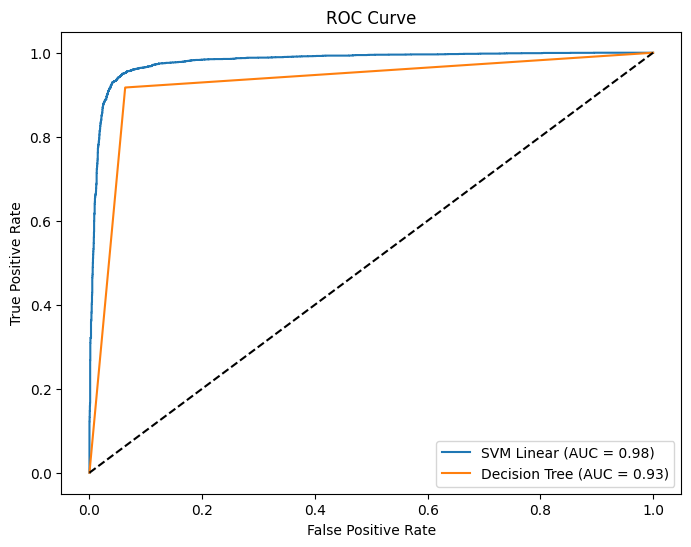

In [27]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the validation dataset
svm_valid_pred = svm_pipeline.predict(valid['lemmas'])
tree_valid_pred = tree_pipeline.predict(valid['lemmas'])

# Compute classification report (precision, recall, F1-score)
svm_report = classification_report(valid['is_democrat'], svm_valid_pred, target_names=['Republican', 'Democrat'])
tree_report = classification_report(valid['is_democrat'], tree_valid_pred, target_names=['Republican', 'Democrat'])

print("Classification Report - LinearSVC:")
print(svm_report)
print("Classification Report - Decision Tree:")
print(tree_report)

# Compute ROC curve
svm_probs = svm_pipeline.decision_function(valid['lemmas'])
tree_probs = tree_pipeline.predict_proba(valid['lemmas'])[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(valid['is_democrat'], svm_probs)
fpr_tree, tpr_tree, _ = roc_curve(valid['is_democrat'], tree_probs)

# Compute ROC AUC score
svm_auc = roc_auc_score(valid['is_democrat'], svm_probs)
tree_auc = roc_auc_score(valid['is_democrat'], tree_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM Linear (AUC = {svm_auc:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


9. Analyser les résultats

**LogisticRegression**

Le rapport de classification fournit une évaluation détaillée des performances du modèle sur les données d'entraînement. Voici une interprétation des différentes métriques :

- **Précision** : Il s'agit de la capacité du modèle à ne pas classer à tort une instance comme positive. En d'autres termes, c'est la proportion d'instances correctement identifiées comme positives parmi toutes les instances classées comme positives par le modèle. Dans ce cas, la précision est de 86% pour la classe "False" (non démocrate) et de 87% pour la classe "True" (démocrate). Cela signifie que 86% des tweets prédits comme non démocrates le sont effectivement, et 87% des tweets prédits comme démocrates le sont effectivement.

- **Rappel** : Il s'agit de la capacité du modèle à identifier correctement toutes les instances positives. En d'autres termes, c'est la proportion d'instances positives correctement identifiées parmi toutes les instances réellement positives. Dans ce cas, le rappel est de 88% pour la classe "False" et de 85% pour la classe "True". Cela signifie que le modèle a correctement identifié 88% de tous les tweets non démocrates et 85% de tous les tweets démocrates.

- **F1-score** : Il s'agit d'une mesure de la précision et du rappel. Il est calculé comme la moyenne pondérée de la précision et du rappel. Un F1-score élevé indique à la fois une bonne précision et un bon rappel. Dans ce cas, le F1-score est de 0.87 pour la classe "False" et de 0.86 pour la classe "True".

- **Support** : Il s'agit du nombre d'instances de chaque classe dans les données d'entraînement.

En résumé, le modèle semble avoir de bonnes performances globales, avec des scores de précision, de rappel et de F1-score élevés pour les deux classes. Cependant, il peut y avoir un léger déséquilibre entre la précision et le rappel pour les deux classes, ce qui peut être pris en compte en ajustant les seuils de classification si nécessaire.


**SVM Linear & Decision Tree**

À partir des rapports de classification, nous pouvons faire les observations suivantes :

1. **Précision** : La précision mesure l'exactitude des prédictions positives. Pour les deux classificateurs, les valeurs de précision sont élevées, ce qui indique que lorsqu'ils prédisent un tweet comme étant républicain ou démocrate, ils sont généralement corrects. Le SVC linéaire a des valeurs de précision légèrement plus élevées pour les républicains et les démocrates par rapport au classificateur d'arbre de décision.

2. **Rappel** : Le rappel mesure la capacité du classificateur à identifier correctement les vrais positifs. Le SVC linéaire a un rappel plus élevé pour les républicains, ce qui indique qu'il est meilleur pour identifier correctement les tweets républicains. Cependant, le classificateur d'arbre de décision a légèrement plus de rappel pour les démocrates.

3. **Score F1** : Le score F1 est la moyenne harmonique de la précision et du rappel et fournit un équilibre entre les deux mesures. Les deux classificateurs ont des scores F1 élevés pour les républicains et les démocrates, ce qui indique une performance globalement bonne.

4. **Exactitude** : Les deux classificateurs atteignent une exactitude globale élevée, le SVC linéaire étant légèrement meilleur que le classificateur d'arbre de décision.

Dans l'ensemble, les deux classificateurs démontrent une performance solide dans la classification des tweets en catégories républicaines et démocrates. Cependant, le SVC linéaire semble généralement mieux performant selon toutes les mesures évaluées. Cela suggère que le SVC linéaire pourrait être un choix plus approprié pour cette tâche de classification.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3016af4e-32d8-4d2b-b1fc-42f5d8c1f653' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>